# read and transform google form data
Google Form: https://goo.gl/forms/mahcMnQxzc2vZhoz2  
Google Sheets: https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/edit#gid=22521621

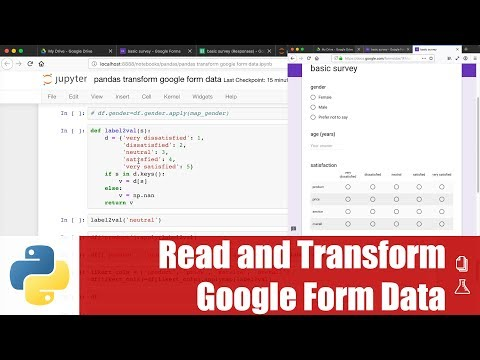

In [1]:
#เรียนรู้ การดึงข้อมูลจาก Google Sheet จากการตอบแบบสอบถามของ google Form
from IPython.display import IFrame, YouTubeVideo, SVG, HTML
YouTubeVideo('mVXUZSyIq40', 400,300)

In [1]:
import pandas as pd
import numpy as np

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy  version: {np.__version__}')

pandas version: 0.25.1
numpy  version: 1.16.4


In [3]:
# google form url: https://goo.gl/forms/mahcMnQxzc2vZhoz2

# google sheets generated by google form
# https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/edit#gid=22521621
# note: replace 'edit#' with 'export?format=xlsx&'
url='https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/export?format=xlsx&gid=22521621'
df = pd.read_excel(url)
df

,Timestamp,gender,age (years),satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall]
0,2018-11-04 15:19:30.871,Male,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,Female,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,Prefer not to say,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,Female,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,Female,44.0,dissatisfied,neutral,dissatisfied,neutral
...,...,...,...,...,...,...,...
68,2018-11-08 10:04:37.888,Female,NaN,very dissatisfied,dissatisfied,neutral,very satisfied
69,2018-11-08 10:04:47.142,Male,10.0,very dissatisfied,dissatisfied,neutral,neutral
70,2018-11-08 10:04:56.394,Prefer not to say,25.0,very dissatisfied,dissatisfied,neutral,satisfied
71,2019-08-04 22:11:22.604,Female,25.0,satisfied,satisfied,satisfied,satisfied


In [4]:
df.columns

Index(['Timestamp', 'gender', 'age (years)', 'satisfaction [product]',
       'satisfaction [price]', 'satisfaction [service]',
       'satisfaction [overall]'],
      dtype='object')

In [5]:
new_colnames = ['timestamp', 'gender', 'age', 'product', 'price', 'service', 'overall']

In [6]:
df.columns = new_colnames
df

,timestamp,gender,age,product,price,service,overall
0,2018-11-04 15:19:30.871,Male,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,Female,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,Prefer not to say,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,Female,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,Female,44.0,dissatisfied,neutral,dissatisfied,neutral
5,2018-11-04 18:03:14.928,Prefer not to say,77.0,dissatisfied,neutral,satisfied,very satisfied
6,2018-11-04 18:05:08.912,Male,88.0,very dissatisfied,very dissatisfied,dissatisfied,neutral
7,2018-11-04 18:06:52.787,Female,88.0,satisfied,neutral,neutral,satisfied
8,2018-11-04 18:09:28.268,Prefer not to say,100.0,dissatisfied,neutral,satisfied,very satisfied
9,2018-11-04 18:33:17.646,NaN,15.0,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied


## recode gender 

In [7]:
d = {'Female': 'F',
     'Male': 'M',
     'Prefer not to say': 'X'}

df.gender.map(d, na_action='ignore')

0       M
1       F
2       X
3       F
4       F
5       X
6       M
7       F
8       X
9     NaN
10      M
11      M
12      M
13      M
14      F
15      M
16      M
17      M
Name: gender, dtype: object

In [8]:
df.gender=df.gender.map(d, na_action='ignore')

In [9]:
df

,timestamp,gender,age,product,price,service,overall
0,2018-11-04 15:19:30.871,M,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,F,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,X,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,F,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,F,44.0,dissatisfied,neutral,dissatisfied,neutral
5,2018-11-04 18:03:14.928,X,77.0,dissatisfied,neutral,satisfied,very satisfied
6,2018-11-04 18:05:08.912,M,88.0,very dissatisfied,very dissatisfied,dissatisfied,neutral
7,2018-11-04 18:06:52.787,F,88.0,satisfied,neutral,neutral,satisfied
8,2018-11-04 18:09:28.268,X,100.0,dissatisfied,neutral,satisfied,very satisfied
9,2018-11-04 18:33:17.646,NaN,15.0,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied


## recode 'product', 'price', 'service', 'overall' columns

In [10]:
def label2val(s):
    d = {'very dissatisfied': 1,
         'dissatisfied': 2,
         'neutral': 3,
         'satisfied': 4,
         'very satisfied': 5}
    if s in d.keys():
        v = d[s]
    else:
        v = np.nan
    return v

In [11]:
label2val('satisfied')

4

In [12]:
df['product'].apply(label2val)

0     1
1     3
2     5
3     1
4     2
5     2
6     1
7     4
8     2
9     1
10    2
11    2
12    2
13    1
14    2
15    1
16    2
17    1
Name: product, dtype: int64

In [13]:
df[['product', 'price', 'service', 'overall']].applymap(label2val)

,product,price,service,overall
0,1,2,3,4
1,3,2,4,5
2,5,4,4,5
3,1,2,3,4
4,2,3,2,3
5,2,3,4,5
6,1,1,2,3
7,4,3,3,4
8,2,3,4,5
9,1,1,1,1


In [14]:
likert_cols = ['product', 'price', 'service', 'overall']
df[likert_cols]=df[likert_cols].applymap(label2val)

In [15]:
df

,timestamp,gender,age,product,price,service,overall
0,2018-11-04 15:19:30.871,M,40.0,1,2,3,4
1,2018-11-04 15:19:46.073,F,NaN,3,2,4,5
2,2018-11-04 15:20:00.145,X,NaN,5,4,4,5
3,2018-11-04 15:42:03.025,F,25.0,1,2,3,4
4,2018-11-04 15:43:23.132,F,44.0,2,3,2,3
5,2018-11-04 18:03:14.928,X,77.0,2,3,4,5
6,2018-11-04 18:05:08.912,M,88.0,1,1,2,3
7,2018-11-04 18:06:52.787,F,88.0,4,3,3,4
8,2018-11-04 18:09:28.268,X,100.0,2,3,4,5
9,2018-11-04 18:33:17.646,NaN,15.0,1,1,1,1


### read ALL sheets

In [16]:
url='https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/export?format=xlsx'
dfs = pd.read_excel(url, sheet_name=None)

In [17]:
len(dfs)

4

In [18]:
dfs.keys()

odict_keys(['resp', 'resp_mod', 'lookup', 'var_label'])

In [19]:
dfs['resp'].head(10)

,Timestamp,gender,age (years),satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall]
0,2018-11-04 15:19:30.871,Male,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,Female,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,Prefer not to say,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,Female,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,Female,44.0,dissatisfied,neutral,dissatisfied,neutral
5,2018-11-04 18:03:14.928,Prefer not to say,77.0,dissatisfied,neutral,satisfied,very satisfied
6,2018-11-04 18:05:08.912,Male,88.0,very dissatisfied,very dissatisfied,dissatisfied,neutral
7,2018-11-04 18:06:52.787,Female,88.0,satisfied,neutral,neutral,satisfied
8,2018-11-04 18:09:28.268,Prefer not to say,100.0,dissatisfied,neutral,satisfied,very satisfied
9,2018-11-04 18:33:17.646,NaN,15.0,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied


In [20]:
dfs['resp_mod']

,timestamp,gender,age,product,price,service,overall
0,2018-11-04 15:19:30.720,M,40.0,1,2,3,4
1,2018-11-04 15:19:46.272,F,NaN,3,2,4,5
2,2018-11-04 15:20:00.096,X,NaN,5,4,4,5
3,2018-11-04 15:42:02.880,F,25.0,1,2,3,4
4,2018-11-04 15:43:23.232,F,44.0,2,3,2,3
5,2018-11-04 18:03:15.264,X,77.0,2,3,4,5
6,2018-11-04 18:05:09.312,M,88.0,1,1,2,3
7,2018-11-04 18:06:52.992,F,88.0,4,3,3,4
8,2018-11-04 18:09:28.512,X,100.0,2,3,4,5
9,2018-11-04 18:33:17.568,NaN,15.0,1,1,1,1


In [21]:
dfs['lookup']

,label,value
0,Male,M
1,Female,F
2,Prefer not to say,X
3,very dissatisfied,1
4,dissatisfied,2
5,neutral,3
6,satisfied,4
7,very satisfied,5


In [22]:
dfs['var_label']

,item label,item var
0,Timestamp,timestamp
1,gender,gender
2,age (years),age
3,satisfaction [product],product
4,satisfaction [price],price
5,satisfaction [service],service
6,satisfaction [overall],overall


In [23]:
# dfs['resp'].to_csv('data/resp.csv', index=False)